<a href="https://colab.research.google.com/github/jeff-lim/ML_Study/blob/main/1031_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import tensorflow as tf
import keras

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from google.colab import auth, drive, files

import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#Mnist 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#Train set 과 Test set 정리하기
input_shape = (28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)


In [ ]:
#CNN 모델 만들기
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [ ]:
#CNN 모델 학습하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
                 batch_size=128,
                 epochs=10,
                 verbose=1,
                 validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 19s 6ms/step - loss: 0.4098 - accuracy: 0.8711 - val_loss: 0.0736 - val_accuracy: 0.9766
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1509 - accuracy: 0.9546 - val_loss: 0.0548 - val_accuracy: 0.9815
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1149 - accuracy: 0.9668 - val_loss: 0.0393 - val_accuracy: 0.9880
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0978 - accuracy: 0.9708 - val_loss: 0.0350 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0849 - accuracy: 0.9741 - val_loss: 0.0306 - val_accuracy: 0.9909
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0783 - accuracy: 0.9766 - val_loss: 0.0310 - val_accuracy: 0.9899
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0675 - accuracy: 0.9799 - val_loss: 0.0311 - val_accuracy: 0.9901
Epoch

In [ ]:
# Test
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

313/313 [==============================] - 1s 3ms/step - loss: 0.0275 - accuracy: 0.9918
loss_and_metrics : [0.027527347207069397, 0.9918000102043152]


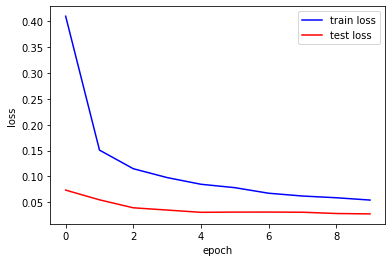

In [ ]:
#loss graph 그리기
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'b', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper right')

plt.show()

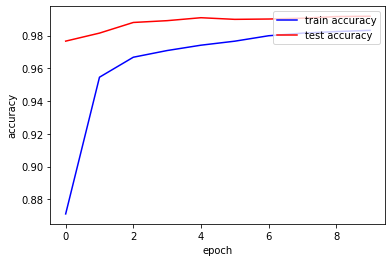

In [ ]:
#Accuracy graph 그리기
fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
loss_ax.plot(hist.history['val_accuracy'], 'r', label='test accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper right')

plt.show()

In [ ]:
#Google Drive에 저장한 직접 작성한 손글씨를 업로드
uploaded = files.upload()

Saving n7.jpg to n7.jpg


In [ ]:
#파일불러오기
fn = next(iter(uploaded))

img = cv2.imread('/../content/{:}'.format(fn), cv2.IMREAD_GRAYSCALE)

The number You Wrote number is 7


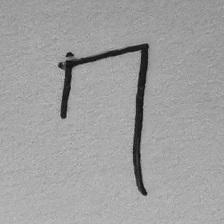

In [ ]:
#문자인식결과출력
img_re = cv2.resize(255-img,(28,28))

chk_num = img_re.flatten()/255.0
chk_num = chk_num.reshape((-1,28,28,1))
predictions = model.predict(chk_num)

class_names = ['0','1','2','3','4','5','6','7','8','9','10']

print('The number You Wrote number is',(class_names[np.argmax(predictions)]))
cv2_imshow(img)